In [13]:
data <- read.csv("C:\\Users\\LENOVO\\Desktop\\creditcard.csv", header = TRUE,
                  stringsAsFactors = FALSE,
                  strip.white = TRUE ,
                  sep = ',')
data$Class= as.factor(data$Class)

In [14]:
table(data$Class)


     0      1 
284315    492 

In [15]:
library(caTools)
set.seed(123)

# Spliting data into training set and test set
split = sample.split(data$Class, SplitRatio = 0.8)
training_set = subset(data, split == TRUE)
test_set = subset(data, split == FALSE)

#head(training_set)

In [16]:
#sclaing the fields
training_set[-31] = scale(training_set[-31])
test_set[-31] = scale(test_set[-31])
nrow(training_set)
nrow(test_set)
table(training_set[,31])

[1] 227846

[1] 56961


     0      1 
227452    394 

In [17]:
# ROSE Sampling, this helps us to generate data synthetically. It generates artificial datas instead of dulicate data.
library(ROSE)
rose_sample_train_data <- ovun.sample(Class ~ ., data = training_set , method = "under", seed=111)$data
table(rose_sample_train_data$Class)


  0   1 
415 394 

In [26]:
library(e1071)
svm_model<-svm(Class~V14+V10,data= rose_sample_train_data, type = 'C-classification', kernel = 'radial')

In [27]:
summary(svm_model)


Call:
svm(formula = Class ~ V14 + V10, data = rose_sample_train_data, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  145

 ( 69 76 )


Number of Classes:  2 

Levels: 
 0 1




In [28]:
svm_predict = predict(svm_model, type = 'response', newdata = test_set[-31])

   svm_predict
        0     1
  0 56191   672
  1    17    81

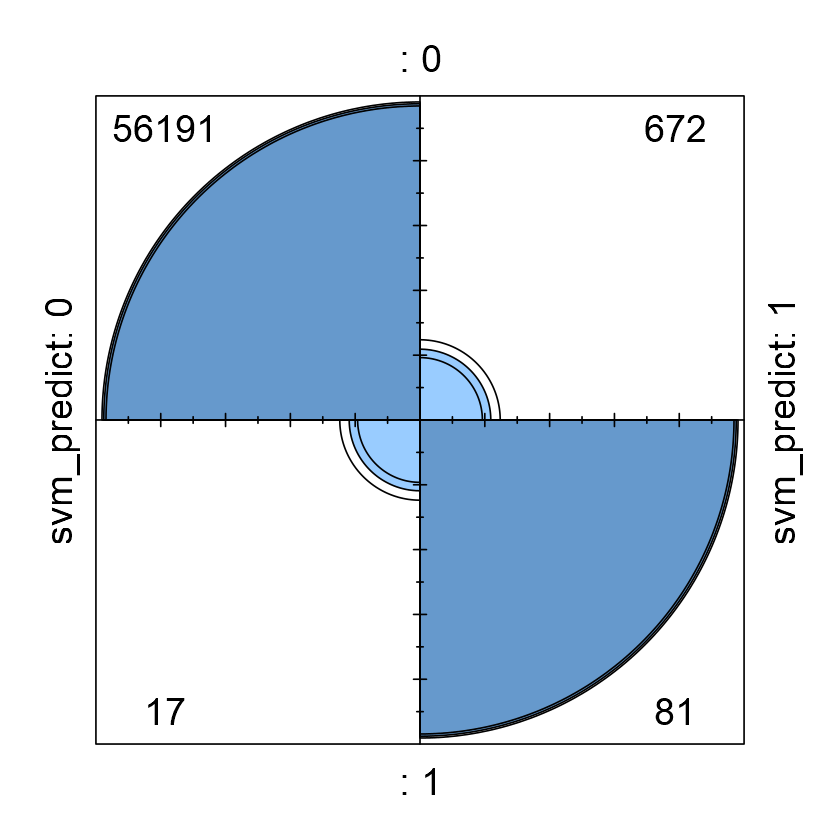

In [29]:
#confusion matrix
library(caret)
#confusion matrix
table(test_set$Class, svm_predict)
fourfoldplot(table(test_set$Class, svm_predict))

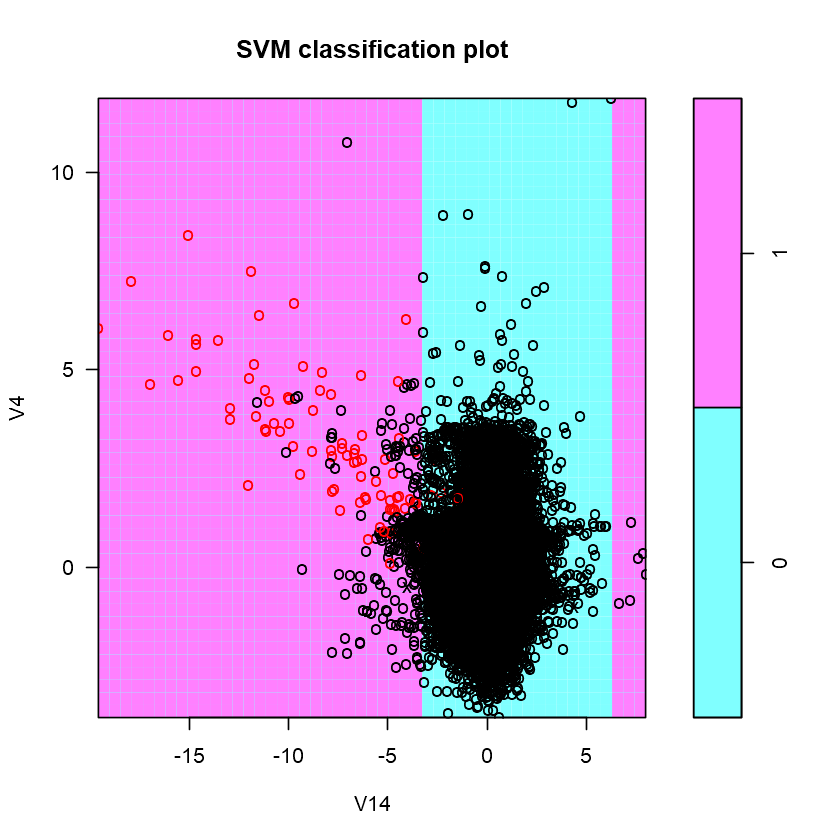

In [32]:
plot(svm_model,test_set,V4~V14)

In [ ]:
#if V14<-4 and greater than 6 there is a definate chance of fraudlant transaction